<a href="https://colab.research.google.com/github/SimplyDifficult/ML-for-Wireless/blob/main/24.%20PI_P%3D10_of_20_dim_user_case_BOGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
P_max = 10 #in dBm

In [2]:
var = 20
number_of_cells = 4

In [3]:
!sudo add-apt-repository ppa:octave/stable
!sudo apt update
!sudo apt install octave

 The latest version of GNU Octave built for all supported Ubuntu releases. GNU Octave is normally distributed with Ubuntu, this PPA is for you if you have a need to use a newer version of Octave than what you can already get from your installed version of Ubuntu.

Simply follow the instructions below to add this PPA to your system and install the octave package. If it's not that easy or you encounter any errors, contact the team and let us know.

Much credit goes to the Debian Octave Group who maintain the official Debian packages that this work is derived from. Without their efforts to bring Octave packaging to such a high level of quality in Debian and Debian derivatives, this PPA would not be here.
 More info: https://launchpad.net/~octave/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:

In [4]:
!wget https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
!wget https://www.dropbox.com/s/d1ytzzfpxsrpbcv/main_bitchanged.m -O /content/main.m
!wget https://www.dropbox.com/s/v3y2xe56qodthnm/function_SE.m
!wget https://www.dropbox.com/s/5p0j4qdqist7ibm/main_individual_transmit_case_for_Test_phase_bitchanged.m -O /content/main_individual_transmit_case_for_Test_phase.m

--2021-10-31 08:01:53--  https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m [following]
--2021-10-31 08:01:53--  https://www.dropbox.com/s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1f9faa21b989cfd2105869808e.dl.dropboxusercontent.com/cd/0/inline/BZGXkHu7WANqB-IV2RaKKd0OO7RheGKVhJnfkyXGsel6pG415dglFhmA-GIZTKgYu2nH3LddC9XHRPy9xBlSsSBbNU5djtJlU9qzSOIkDPLNkZ9uQdaYOAZppmXwfYACI5U2E3L-fVQw7oU0Hytl9xzU/file# [following]
--2021-10-31 08:01:53--  https://uc1f9faa21b989cfd2105869808e.dl.dr

In [5]:
!wget https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
!wget https://www.dropbox.com/s/52gyqiq137mo2bb/SE.mat

--2021-10-31 08:01:55--  https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/utf73kdk09gjvsu/RR.mat [following]
--2021-10-31 08:01:55--  https://www.dropbox.com/s/raw/utf73kdk09gjvsu/RR.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1814f2c24352f82110787d7d02.dl.dropboxusercontent.com/cd/0/inline/BZGVMRya0AmK1g7UMMQWPG3aHTCy6LAcqe7SMxKOyJmNnVfeFHzjGwnEGjSPWVr-yMsashnvkyYjoXBeAJM7UiJeTSP0LO03K6ngkZvt1gqlsGK3-ip-Db2mny5Ha8VCvV3lLEsz4op5j83kn37sBaNe/file# [following]
--2021-10-31 08:01:56--  https://uc1814f2c24352f82110787d7d02.dl.dropboxusercontent.com/cd/0/inline/BZGVMRya0AmK1g7UMMQWPG3aHTCy6LAcqe7SMxKOyJmNnVfeFHzjGwnEGjSPWVr-yMsashnvkyYjoXBeAJM7UiJeTSP0LO03K6ngkZvt1gql

In [3]:
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot
from scipy.optimize import minimize
import numpy as np
from scipy.io import loadmat, savemat
import numpy as np
from google.colab import files
import cv2
from scipy.optimize import dual_annealing

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#### Objective function
import random
def objective(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W main.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [9]:
#surrogate or approximation for the objective function
def surrogate(model, X):
	#catch any warning generated when making a prediction
	with catch_warnings():
		#ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [10]:
def PIacquisition(Xsamples, X, model):
  Xsamples = Xsamples[np.newaxis,:]
  yhat, _ = surrogate(model, X)
  best = max(yhat)
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  probs = norm.cdf((mu - best) / (std+1E-30))
  return -probs[0]

In [11]:
#optimize the acquisition function
def opt_acquisition(X, y, model):
  #Do it 5 times
  r_min, r_max = -31.0, P_max  
  bounds = []
  for ti in range(var):
    bounds = bounds + [[r_min, r_max]]
  min_result = 9999999999999.0
  min_answer = 0
  
  for i in range(1):
    result = dual_annealing(PIacquisition, bounds, args=(X,model))
    if(result.fun<min_result):
      min_result = result.fun
      min_answer = result['x']    
  return min_answer

In [12]:
import random
def objective_FPA(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W /content/main_individual_transmit_case_for_Test_phase.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
X = np.load("/content/drive/MyDrive/trainingx_BOGP_PI_P=10.npy")
y = np.load("/content/drive/MyDrive/trainingy_BOGP_PI_P=10.npy")
y_FPA = np.load("/content/drive/MyDrive/grad_trainingyFPA_BOGP_PI_P=10.npy")

x_next is [  9.9994718    9.99546075 -30.97990964   9.99831334   9.99583254
   9.99345957   9.99886707   9.97215015   9.9814787    9.99208189
   9.99893125 -30.9944658    9.99694116   9.97981203 -30.99723877
   9.99764366   9.9797923    9.99689511   9.99676453   9.99367084]
f()=45.208366, actual=46.487
0


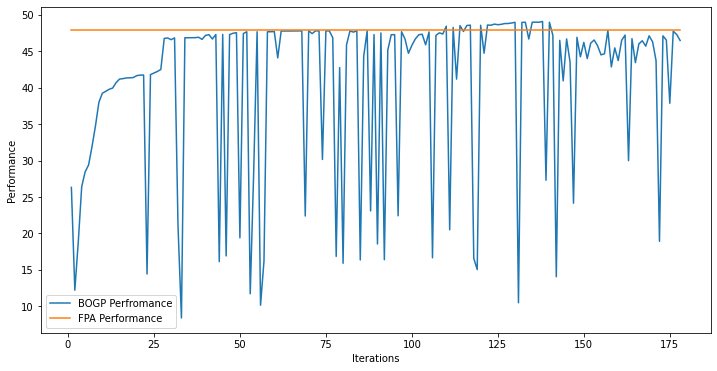

x_next is [-30.33791146   4.8190336  -28.38513821 -23.76209766  -9.8766749
 -12.97565062  -3.25078635   0.41348328 -13.14852443   7.65956847
   7.66912739  -9.10154122 -12.86124235 -28.25123177 -21.00493098
  -6.36652659   4.31846598   6.79168415 -12.19135082  -9.21206422]
f()=40.703453, actual=15.229
1


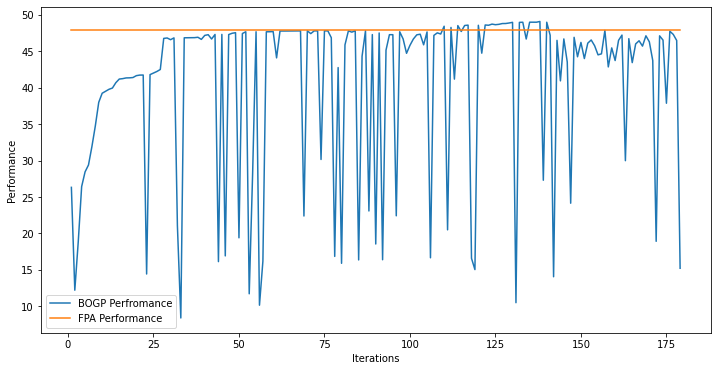

x_next is [  9.99051501   9.99679917 -30.98555979   9.99577595   9.9874443
   9.99342385 -30.96295161   9.98716896   9.99085047   9.99906037
   9.9965182    9.98012419   9.99808302   9.99305781 -30.99916409
   9.98019248   9.99760732   9.9952563    9.99440669   9.99702234]
f()=44.156580, actual=45.992
2


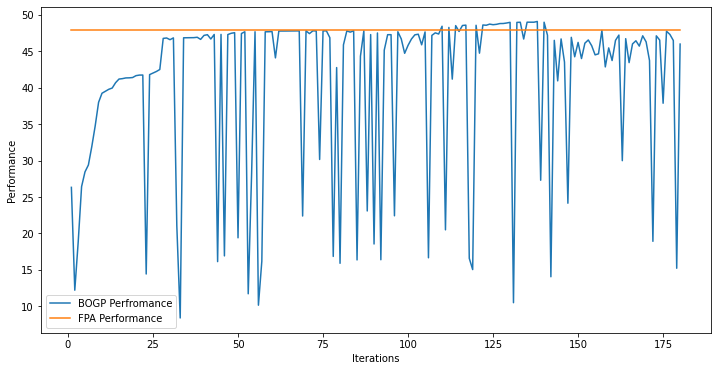

x_next is [  9.99849333 -30.98328351   9.99861668   9.99883108   9.99931387
   9.99627716   9.99942769   9.99886997 -30.99739461   9.99992662
   9.97510324   9.99706829   9.99594248   9.98547589   9.99594515
   9.99968488   9.99906987   9.99642819   9.99979218   9.99956168]
f()=40.590937, actual=47.313
3


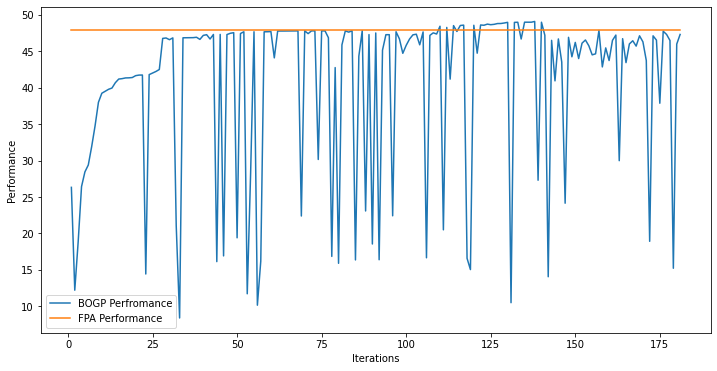

x_next is [  9.99684136   9.99668397   9.96746679   9.98811416   9.99807628
   9.99158842 -30.99583616   9.99910226   9.99912697   9.99215027
   9.97703537 -30.97172563   9.99556001   9.98211207 -30.99249693
   9.99570594   9.98462377   9.99343508   9.99932461   9.98935862]
f()=44.107258, actual=45.552
4


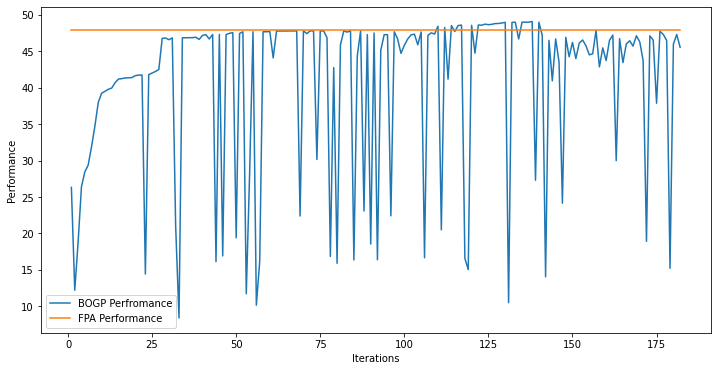

x_next is [  9.99017707 -23.83809365   9.99412655   9.98800341   9.99463264
   9.99522871   9.99125022   9.99904623   9.99127376   9.99172187
   9.98968976   9.99591205   9.99892529   9.99059619   9.94769694
   9.98148371   9.98283503   9.99705211   9.99657558   9.98818628]
f()=46.248524, actual=47.497
5


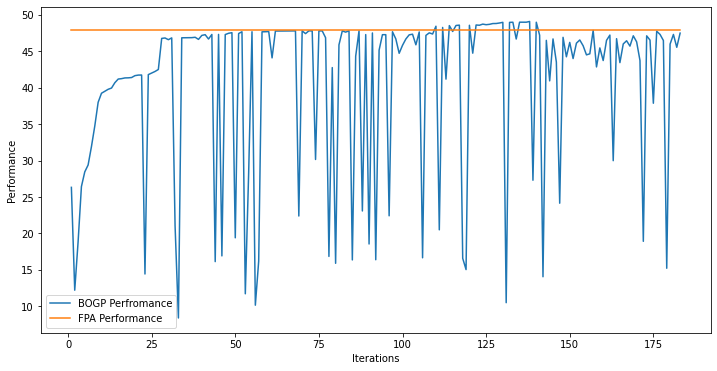

x_next is [  9.99535253   9.96895137 -30.99337654   9.99112303   9.99953339
   9.99527814 -30.99165059   9.98118249 -30.9419365    9.99796004
   9.98317784 -30.98834584   9.99829268   9.99377271 -30.99967084
   9.9985744    9.99146046   9.99719273   9.9845181    9.98161823]
f()=44.586688, actual=45.156
6


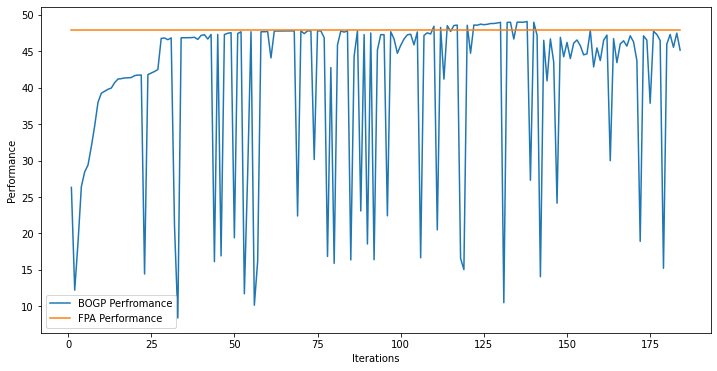

x_next is [  9.99965961   9.99361209 -30.97853348   9.9799095    9.99701227
   9.97324563   9.98132063 -30.99653461   9.97022929   9.9884166
   9.98953618   9.9796679    9.99700409   9.99887495 -30.9951225
   9.99743518   9.97716077   9.99039047   9.98273086   9.99668462]
f()=43.480896, actual=45.695
7


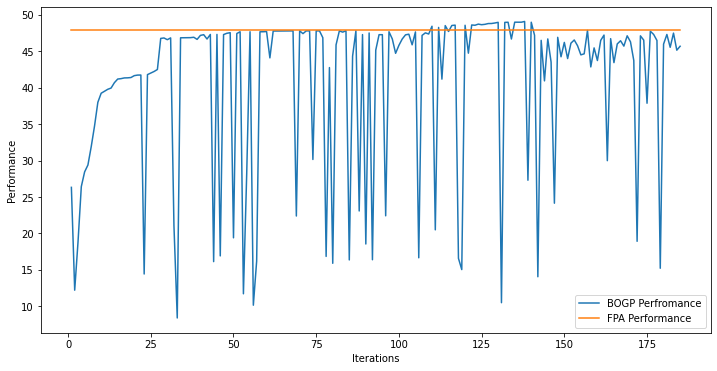

x_next is [-16.97679257 -15.13263156 -22.20842609 -15.77550673   7.01673538
 -27.60606985 -25.67932901   7.64545766 -19.9621645   -8.9489147
   0.58101022 -24.22876645   5.73553113 -28.37298793 -13.14155774
 -27.17669425  -9.16674789 -23.97279886 -18.50054249  -5.34650592]
f()=40.744092, actual=12.039
8


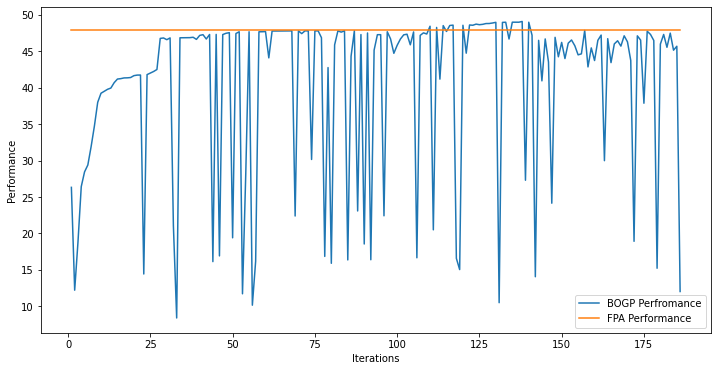

x_next is [  9.98966076   9.98689409   9.99864079   9.99234703   9.99345581
   9.993554     9.98771453   9.99697505   9.98613045   9.99957966
   9.98849428   9.99336272   9.99820765   9.98463041 -30.98393844
   9.99030916 -30.97387796   9.99995052   9.99109451   9.99678638]
f()=43.748783, actual=44.957
9


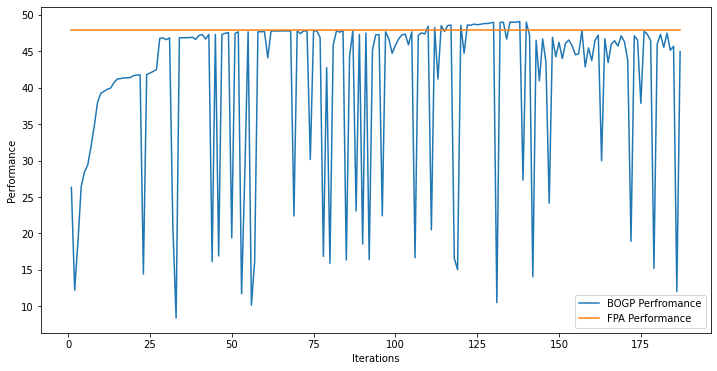

x_next is [  9.97409271 -30.99044001 -30.90547933   9.9831383    9.99671064
   9.99504227   9.96663607   9.98757417   9.99172627   9.98067359
   9.93950993   9.98759096   9.99977532   9.99754585 -30.98976531
   9.99335932   9.99172757   9.98604454   9.98433041   9.99485428]
f()=45.961973, actual=46.723
10


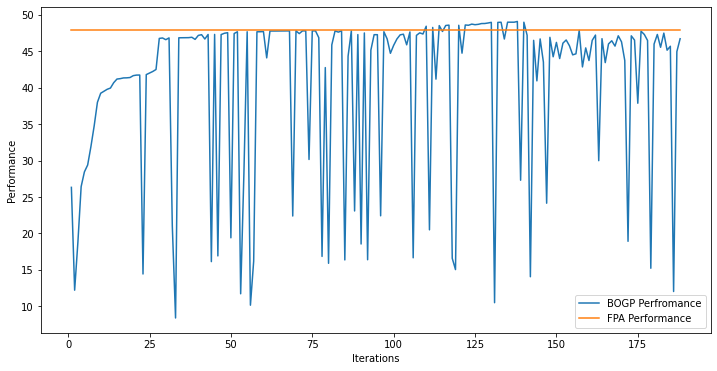

x_next is [  9.9807903  -30.9224886    9.99658573   9.99370201   9.99038619
   9.9996231    9.99797472   9.99469221   9.97865553   9.98309519
   9.9687331    9.99314792   9.98075062   9.99851241 -30.98516978
   9.97655091   9.99304358   9.99172991   9.9927806    9.99814717]
f()=46.580257, actual=46.913
11


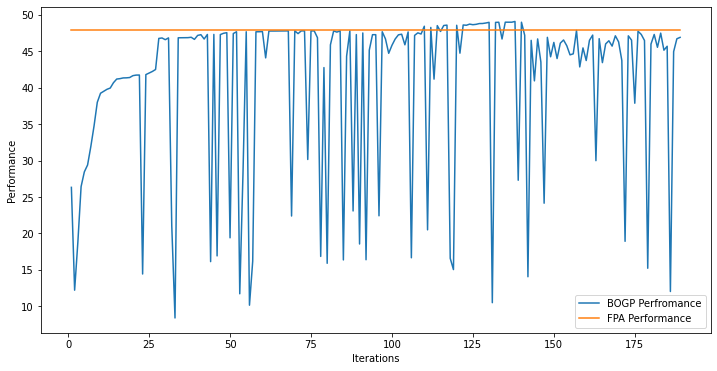

x_next is [  9.9954382    9.99016199 -30.99814512   9.99991673   9.9945286
   9.991405     9.97966826   9.99088605   9.99408463   9.99274744
   9.99867431 -30.97397595   9.99203396   9.99355537 -30.99490485
   9.99127247 -30.93946909   9.9915347    9.99420012   9.98920358]
f()=43.040165, actual=44.124
12


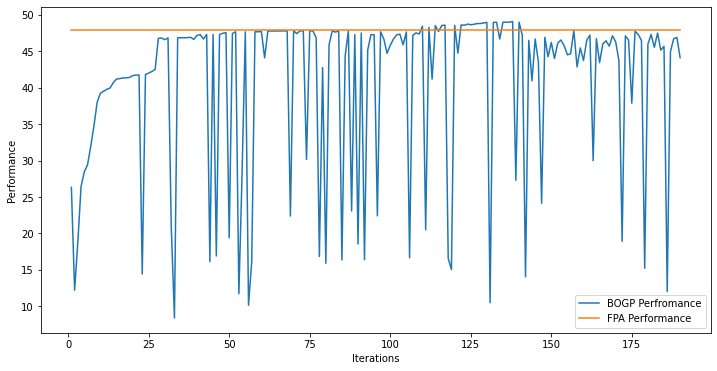

x_next is [  9.994186     9.98655594   9.99798908   9.98935825   9.99865716
   9.99399099   9.99478578   9.99967696   9.99539751   9.99307707
   9.989482   -30.95314316   9.99091045   9.99584442 -30.99916281
   9.99246109   9.98738529   9.98998779   9.97914536   9.9982903 ]
f()=46.142534, actual=46.687
13


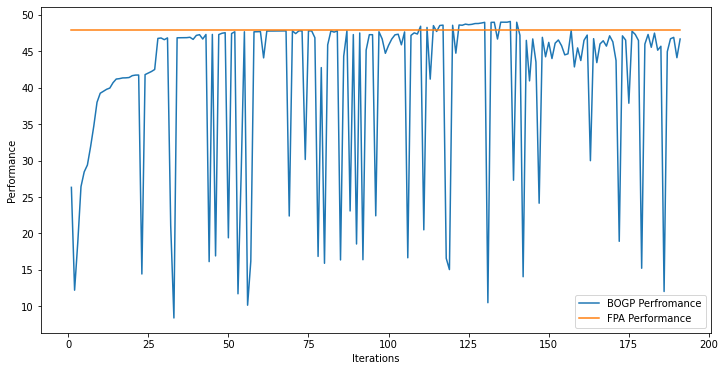

x_next is [  9.99968303   9.99569477 -15.69143772   9.99984944   9.9996573
   9.99989487  -5.50958345   9.99976029  -3.87039319   9.99973022
   9.99971542 -12.54082121   9.99983354   9.99946484 -30.99956898
   9.99976489   9.99988144   9.99986819   9.99999353   9.99999549]
f()=48.449622, actual=45.233
14


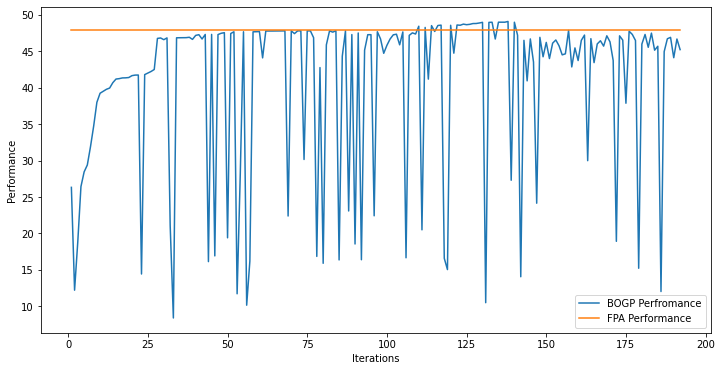

x_next is [  9.99476189 -30.93019955 -30.97389585   9.99782414   9.98270171
   9.99160233   9.99819783   9.99804945   9.97171479   9.98905041
   9.95207704 -30.97698013   9.99908361   9.99590767 -30.99269992
   9.99158421   9.99293979   9.9878273    9.98797686   9.99420489]
f()=44.711952, actual=46.082
15


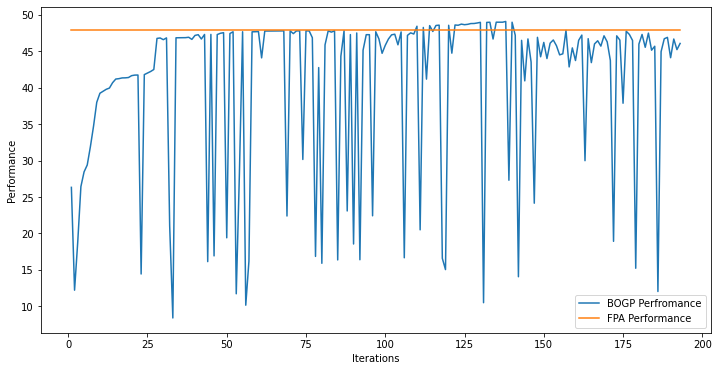

x_next is [-1.26711632e+01 -9.12601944e+00 -1.88867108e+01 -1.83727017e+01
 -2.29781977e+01 -1.22325000e+00  8.61435134e+00 -1.06258772e+01
  3.12691337e+00 -2.77412909e+00 -1.64432712e+01 -2.51052571e+00
 -1.08958577e-02 -1.61513694e+00  6.22086173e+00  5.56389739e+00
 -1.71228109e+01  5.97573218e+00  7.46410155e+00 -5.55633602e+00]
f()=23.106115, actual=20.857
16


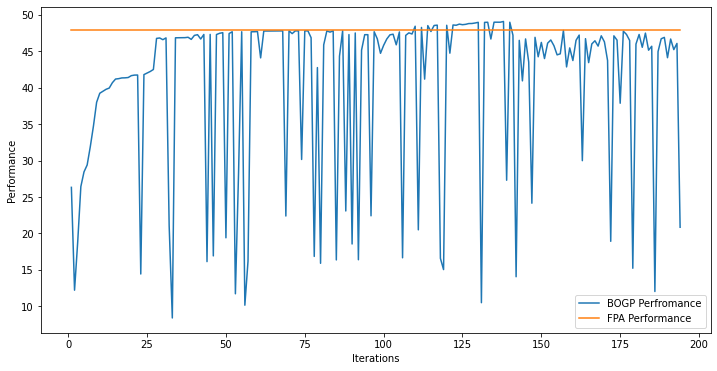

x_next is [  9.99215369   9.98605117 -30.98911973   9.99672312   9.99621931
   9.99901327   9.99457112 -30.98582835 -30.97823186   9.99443587
   9.99446302 -30.9928478    9.9987753    9.99376525 -30.99460913
   9.99842013   9.99971457   9.99765347   9.99277661   9.99676364]
f()=44.008598, actual=44.853
17


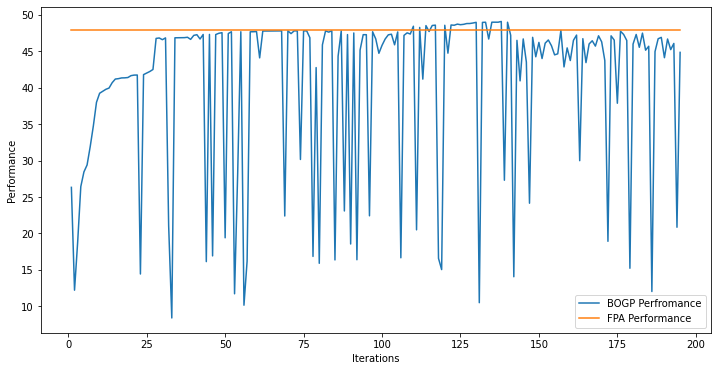

x_next is [  1.97331653 -19.4246769  -17.4932622  -16.50616804  -9.14951847
 -13.24338848 -20.06741695 -12.18766365 -27.18717821 -17.65935097
 -22.60711124 -23.46715948  -9.17210758   6.50775049  -1.36193674
 -21.14807781  -7.06191793   8.54616551  -2.49533347   1.14428213]
f()=40.697950, actual=13.820
18


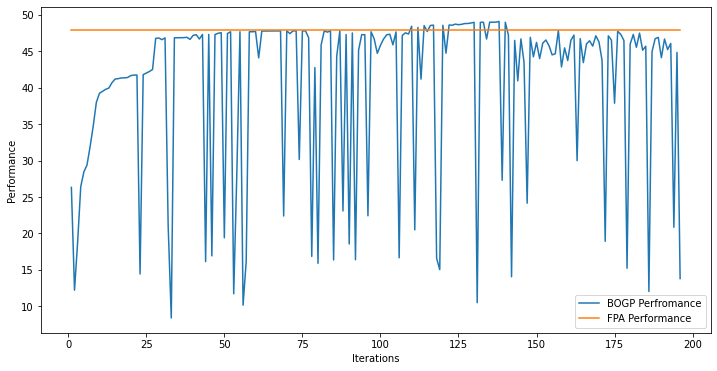

x_next is [  6.92874488 -26.24616396   6.62084592   8.54429422   9.29034274
 -24.91329584  -1.17212279   3.11467095   4.87724934   6.38759452
 -12.61631264  -6.09068967  -0.50504137  -1.4548504    4.60119739
  -3.34041684   6.23624111  -8.18446874  -3.99253723   8.16499893]
f()=28.320208, actual=30.065
19


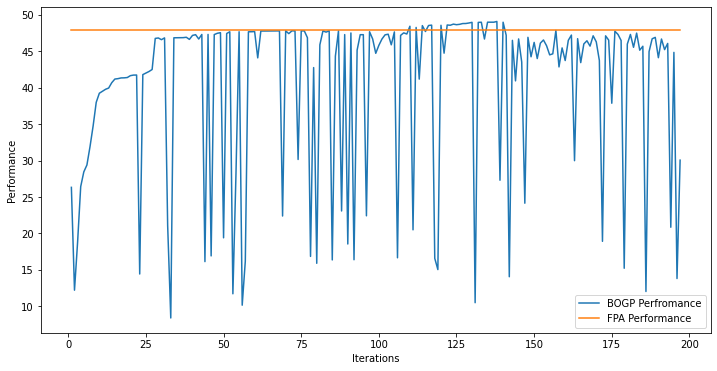

In [16]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernels =  ConstantKernel(constant_value=200, constant_value_bounds = (1e-20, 1e20)) * Matern(length_scale=1, length_scale_bounds=(1e-20,1e20), nu=1.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-20, 1e20)) 
model = GaussianProcessRegressor(kernel = kernels, n_restarts_optimizer=30)

model.fit(X, y)

for i in range(20):
  x_next = opt_acquisition(X, y, model)

  np.save("/content/drive/MyDrive/trainingx_BOGP_PI_P=10.npy",X)
  np.save("/content/drive/MyDrive/trainingy_BOGP_PI_P=10.npy",y)
  np.save("/content/drive/MyDrive/grad_trainingyFPA_BOGP_PI_P=10.npy",y_FPA)
  
  tr = 0
  for l in range(1):
    tr = tr + objective_FPA(x_next.reshape((int)(var/number_of_cells), number_of_cells))
  tr = tr/1.0  
  actual = tr

  tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
  
  est, _ = surrogate(model, [x_next])
  print("x_next is", x_next)
  print('f()=%3f, actual=%.3f' % (est, actual))
  
  X = vstack((X, [x_next]))
  y = vstack((y, [[actual]]))
  y_FPA = vstack((y_FPA, [[tr_FPA]]))
  
  model.fit(X, y)

  print(i)
  pyplot.figure(figsize = (12, 6))

  pyplot.xlabel("Iterations")
  pyplot.ylabel("Performance")
  pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
  pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
  pyplot.legend(["BOGP Perfromance","FPA Performance"])
  pyplot.show()


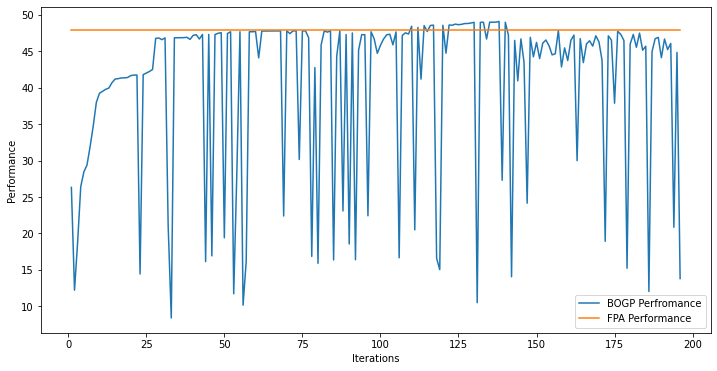

P_max = 10.000, Optimal_SE = 49.097
P_max = 10.000, Optimal_SE_FPA = 47.914


In [8]:
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

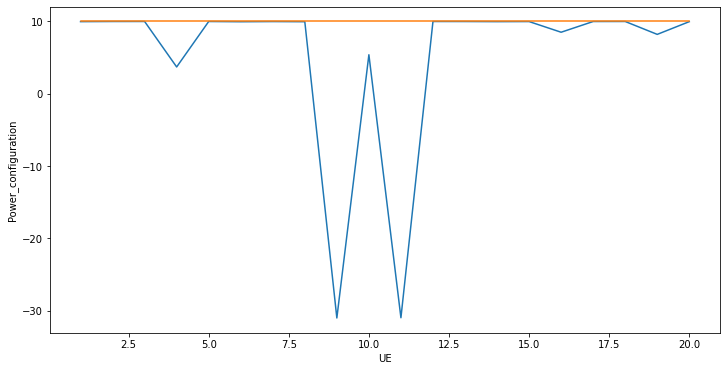

Power_configuration_BOGP is [  9.97624653   9.99544472   9.9980526    3.71036422   9.99494126
   9.96319087   9.98642606   9.9660935  -30.99602044   5.39790046
 -30.96193759   9.9962147    9.99196458   9.9759262    9.98665574
   8.51171295   9.99369455   9.99707019   8.21487863   9.97399493]


In [9]:
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.figure(figsize = (12, 6)) 
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:])
pyplot.plot(np.arange(1,21),X_FPA[:])
pyplot.show()
print("Power_configuration_BOGP is", X[ix])

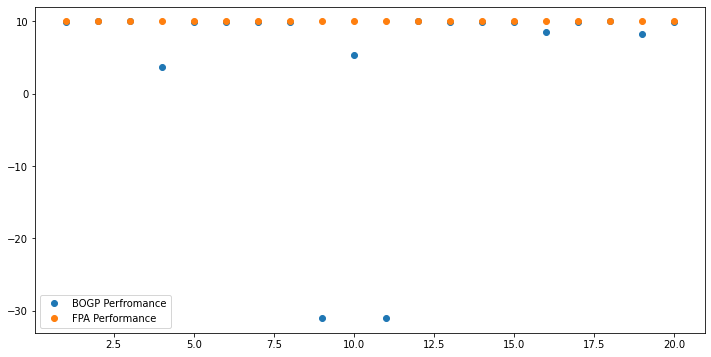

Power_configuration_BOGP is [  9.97624653   9.99544472   9.9980526    3.71036422   9.99494126
   9.96319087   9.98642606   9.9660935  -30.99602044   5.39790046
 -30.96193759   9.9962147    9.99196458   9.9759262    9.98665574
   8.51171295   9.99369455   9.99707019   8.21487863   9.97399493]


In [10]:
import matplotlib.pyplot as plt
X_FPA=np.linspace(P_max,P_max,20)
plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(1,21),X[ix][:], 'o')
plt.plot(np.arange(1,21),X_FPA[:], 'o')
plt.legend(["BOGP Perfromance","FPA Performance"])
plt.show()
print("Power_configuration_BOGP is", X[ix])